In [34]:
# Importações
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

# Carregando datasets

## Vertebral Column 2C
data = arff.loadarff('datasets/VertebralColumn/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8') 
vertebralColumn2Cy = df['class']
vertebralColumn2CX = df.drop(['class'], axis=1) 


## Vertebral Column 3C
data = arff.loadarff('datasets/VertebralColumn/column_3C_weka.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8') 
vertebralColumn3Cy = df['class']
vertebralColumn3CX = df.drop(['class'], axis=1) 


## Wine Quality Red
data = df = pd.read_csv('datasets/WineQualityRed/winequality-red.csv', delimiter=";")
wineQualityRedy = df['quality']
wineQualityRedX = df.drop(['quality'], axis=1) 


## Blood Transfusion Service Center
data = df = pd.read_csv('datasets/BloodTransfusionServiceCenter/transfusion.data', delimiter=",")
bloodTransfusiony = df['whether he/she donated blood in March 2007']
bloodTransfusionX = df.drop('whether he/she donated blood in March 2007', axis=1)

# Dicionarios que irão armazenar os datasets e os targets

datasetsDict = {
    "VertebralColumn2C": vertebralColumn2CX, 
    "VertebralColumn3C": vertebralColumn3CX, 
    "WineQualityRed": wineQualityRedX,
    "BloodTransfusionServiceCenter": bloodTransfusionX
}
targetsDict = { 
    "VertebralColumn2C": vertebralColumn2Cy, 
    "VertebralColumn3C": vertebralColumn3Cy, 
    "WineQualityRed": wineQualityRedy,
    "BloodTransfusionServiceCenter": bloodTransfusiony
}


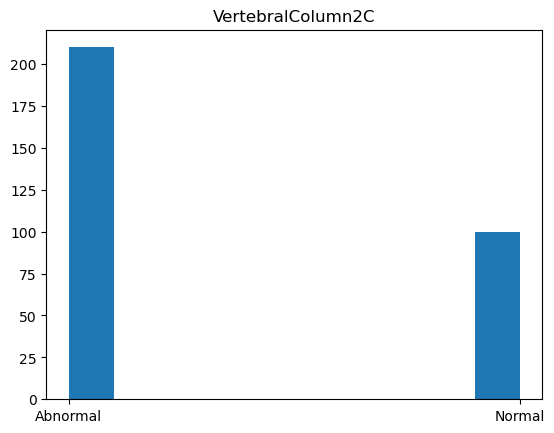

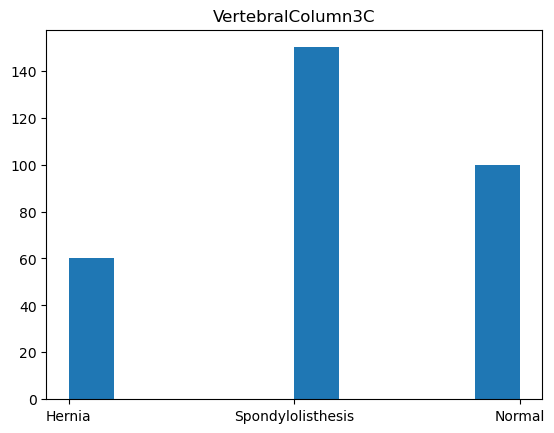

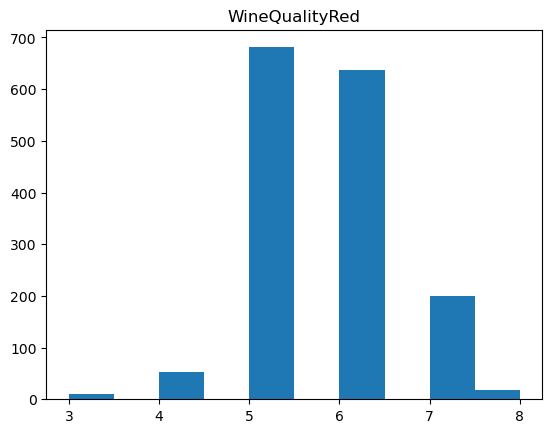

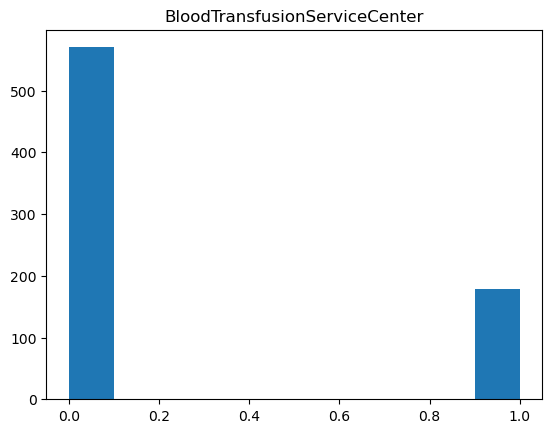

In [36]:
#Verificando número de amostras em cada classe
for target in targetsDict:
    plt.figure()
    plt.title(target)
    plt.hist(targetsDict[target])

In [42]:
# Descrição do dataset
for dataset in datasetsDict:
    print(dataset)
    description = datasetsDict[dataset].describe()
    print(description)

VertebralColumn2C
       pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis  
count     310.000000                310.000000  
mean      117.920655                 26.296694  
std        13.317377                 37.559027  
min        70.082575                -11.058179  
25%       110.709196                  1.603

In [ ]:
#Importação do MinMaxScaler para normalização do dataset, tendo em vista as discrepâncias entres as variaveis
from sklearn.preprocessing import MinMaxScaler
#Importação da NumPy
import numpy as np

#Normalizando dataset
scaler = MinMaxScaler()
scaler.fit(dataset)
           
#Atribuindo o dataset completo a uma variável para utilizar posteriormente    
dataset_norm=scaler.transform(dataset)

#Visualização dos atributos e do target
dataset_norm = pd.DataFrame(dataset_norm, columns = dataset.columns)
dataset_norm_ = pd.DataFrame(np.hstack((dataset_norm, y[:, np.newaxis])), columns = dataset.columns.tolist() + ['class'])

#Plotando grafico para visualização de correlações
g = sns.pairplot(dataset_norm_, hue = 'class', diag_kind='hist')
g.fig.set_figheight(16)
g.fig.set_figwidth(16)
g

In [ ]:
#Verificando manualmente a correlação entre os atributos e as classes
plt.figure(figsize = (16,16))
sns.heatmap(dataset_norm_.corr(), annot = True, linewidths=.5, cmap='coolwarm')

In [ ]:
#função para obter as features selecionadas e as features não selecionadas pelo método de seleção de atributos
def getFeaturesNames(feature_selector):
    features_norm = X.feature_names
    mask = feature_selector.get_support(indices=True)
    features_trim = [features_norm[i] for i in mask]
    featutres_trim_excluded = [element for i, element in enumerate(features_norm) if i not in mask]
    return features_trim,  featutres_trim_excluded

In [ ]:
#importações dos métodos e dos classificadores
from sklearn.feature_selection import SelectKBest, f_classif,chi2, SelectPercentile, SequentialFeatureSelector,RFE, RFECV, SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#n~umero de features desejadas
n_features = 7


In [ ]:
#MÉTODOS FILTRO

##SelectKBest - Obtendo as n features com os maiores score definidos pela função f_classif(ANOVA)
bestfeatures_SelectKBest = SelectKBest(score_func=f_classif,k=n_features)
dataset_trim_SelectKBest = bestfeatures_SelectKBest.fit_transform(dataset_norm, y)
features_trim_SelectKBest,features_trim_excluded_SelectKBest = getFeaturesNames(bestfeatures_SelectKBest)

##SelectPercentile - Obtendo porcentagem de features com os maiores score definidos pela função f_classif(ANOVA)
bestfeatures_SelectPercentile =  SelectPercentile(score_func=f_classif, percentile=50)
dataset_trim_SelectPercentile = bestfeatures_SelectPercentile.fit_transform(dataset_norm, y)
features_trim_SelectPercentile,features_trim_excluded_SelectPercentile = getFeaturesNames(bestfeatures_SelectPercentile)

In [ ]:
#MÉTODOS WRAPPER

##SequentialFeatureSelector
knn = KNeighborsClassifier() #estimador
bestfeatures_SFS = SequentialFeatureSelector(knn, n_features_to_select=n_features)
dataset_trim_SFS = bestfeatures_SFS.fit_transform(dataset_norm, y)
features_trim_SFS,features_trim_excluded_SFS = getFeaturesNames(bestfeatures_SFS)

##Recursive Feature Elimination
svr = SVR(kernel="linear") #estimador
bestfeatures_RFE = RFE(svr, n_features_to_select=n_features, step=1)
dataset_trim_RFE = bestfeatures_RFE.fit_transform(dataset_norm, y)
features_trim_RFE,features_trim_excluded_RFE = getFeaturesNames(bestfeatures_RFE)

##Recursive Feature Elimination with cross validation
svc = SVC(kernel="linear") #estimador
min_features_to_select = 1  #mínimo de atributos para selecionar
bestfeatures_RFECV = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(n_features), #Cross-Validation,
    scoring="accuracy"
)
dataset_trim_RFECV = bestfeatures_RFECV.fit_transform(dataset_norm, y)
features_trim_RFECV,features_trim_excluded_RFECV = getFeaturesNames(bestfeatures_RFECV)

In [ ]:
#MÉTODO EMBEDDED

##Select From Model
bestfeatures_SelectFromModel = SelectFromModel(estimator=LogisticRegression())
dataset_trim_SelectFromModel = bestfeatures_SelectFromModel.fit_transform(dataset_norm, y)
features_trim_SelectFromModel,features_trim_excluded_SelectFromModel = getFeaturesNames(bestfeatures_SelectFromModel)

In [ ]:

print(X.data.shape)
print(dataset_trim_SelectKBest.shape)
print(dataset_trim_SelectPercentile.shape)
print(dataset_trim_SFS.shape)
print(dataset_trim_RFE.shape)
print(dataset_trim_RFECV.shape)
print(dataset_trim_SelectFromModel.shape)


print(features_trim_SelectKBest)
print(features_trim_SelectPercentile)
print(features_trim_SFS)
print(features_trim_RFE)
print(features_trim_RFECV)
print(features_trim_SelectFromModel)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def train_and_validate(X_train, X_test, y_train, y_test):
    mode = GaussianNB()    
    mode.fit(X_train, y_train);
    y_calc = mode.predict(X_test)
    y_prob = mode.predict_proba(X_test)
    print(accuracy_score(y_test, y_calc))
    #print(y_prob)
    mat = confusion_matrix(y_test, y_calc)
    sns.heatmap(mat.T, annot=True, cbar = False)

    
    
X_train_norm, X_test_norm, y_train, y_test = train_test_split(dataset_norm, y, test_size = 0.10, stratify = None, random_state=0)
X_train_SelectKBest, X_test_SelectKBest = X_train_norm.drop(features_trim_excluded_SelectKBest, axis=1), X_test_norm.drop(features_trim_excluded_SelectKBest, axis=1)
X_train_SelectPercentile, X_test_SelectPercentile = X_train_norm.drop(features_trim_excluded_SelectPercentile, axis=1), X_test_norm.drop(features_trim_excluded_SelectPercentile, axis=1)
X_train_SFS, X_test_SFS = X_train_norm.drop(features_trim_excluded_SFS, axis=1), X_test_norm.drop(features_trim_excluded_SFS, axis=1)
X_train_RFE,X_test_RFE =  X_train_norm.drop(features_trim_excluded_RFE, axis=1), X_test_norm.drop(features_trim_excluded_RFE, axis=1)
X_train_RFECV,X_test_RFECV =  X_train_norm.drop(features_trim_excluded_RFECV, axis=1), X_test_norm.drop(features_trim_excluded_RFECV, axis=1)

X_train_SFM,X_test_SFM =  X_train_norm.drop(features_trim_excluded_SelectFromModel, axis=1), X_test_norm.drop(features_trim_excluded_SelectFromModel, axis=1)



train_and_validate(X_train_norm,  X_test_norm, y_train, y_test )

In [ ]:
train_and_validate(X_train_SelectKBest, X_test_SelectKBest, y_train, y_test )


In [ ]:
train_and_validate(X_train_SelectPercentile, X_test_SelectPercentile, y_train, y_test )

In [ ]:
train_and_validate(X_train_SFS, X_test_SFS, y_train, y_test )

In [ ]:
train_and_validate(X_train_RFE,X_test_RFE, y_train, y_test )


In [ ]:
train_and_validate(X_train_RFECV,X_test_RFECV, y_train, y_test )

In [ ]:
train_and_validate(X_train_SFM, X_test_SFM, y_train, y_test ) 

In [ ]:
import random
import numpy as np

import dr_explainer as dre
import time
data = X.data

clusterShapley = dre.ClusterShapley()
inicio = time.time()
clusterShapley.fit(data, y)

to_explain = np.array(random.sample(data.tolist(), int(data.shape[0] * 0.2)))
shap_values = clusterShapley.transform(to_explain)
fim = time.time()





print(fim - inicio)

import shap


klass = 0
c_exp = shap.Explanation(shap_values[klass], data=to_explain, feature_names=X.feature_names)
shap.plots.beeswarm(c_exp)

In [ ]:
clusterShapley2 = dre.ClusterShapley()
inicio = time.time()
clusterShapley2.fit(dataset_trim_SelectKBest, y)
to_explain2 = np.array(random.sample(dataset_trim_SelectKBest.tolist(), int(dataset_trim_SelectKBest.shape[0] * 0.2)))
shap_values2 = clusterShapley2.transform(to_explain2)
fim = time.time()





print(fim - inicio)


klass2 = 0
c_exp2 = shap.Explanation(shap_values2[klass2], data=to_explain2, feature_names=features_trim_SelectKBest)
shap.plots.beeswarm(c_exp2)

In [ ]:
clusterShapley3 = dre.ClusterShapley()

inicio = time.time()
clusterShapley3.fit(dataset_trim_SelectPercentile, y)
to_explain3 = np.array(random.sample(dataset_trim_SelectPercentile.tolist(), int(dataset_trim_SelectPercentile.shape[0] * 0.2)))
shap_values3 = clusterShapley3.transform(to_explain3)

fim = time.time()





print(fim - inicio)

In [ ]:

clusterShapley4 = dre.ClusterShapley()
inicio = time.time()
clusterShapley4.fit(dataset_trim_SFS, y)
to_explain4 = np.array(random.sample(dataset_trim_SFS.tolist(), int(dataset_trim_SFS.shape[0] * 0.2)))
shap_values4 = clusterShapley4.transform(to_explain4)
fim = time.time()





print(fim - inicio)


In [ ]:

clusterShapley5 = dre.ClusterShapley()
inicio = time.time()
clusterShapley5.fit(dataset_trim_RFE, y)
to_explain5 = np.array(random.sample(dataset_trim_RFE.tolist(), int(dataset_trim_RFE.shape[0] * 0.2)))
shap_values5 = clusterShapley5.transform(to_explain5)
fim = time.time()





print(fim - inicio)

In [ ]:


clusterShapley6 = dre.ClusterShapley()
inicio = time.time()
clusterShapley6.fit(dataset_trim_RFECV, y)
to_explain6 = np.array(random.sample(dataset_trim_RFECV.tolist(), int(dataset_trim_RFECV.shape[0] * 0.2)))
shap_values6 = clusterShapley6.transform(to_explain6)
fim = time.time()





print(fim - inicio)



In [ ]:

clusterShapley7 = dre.ClusterShapley()
inicio = time.time()
clusterShapley7.fit(dataset_trim_SelectFromModel, y)
to_explain7 = np.array(random.sample(dataset_trim_SelectFromModel.tolist(), int(dataset_trim_SelectFromModel.shape[0] * 0.2)))
shap_values7 = clusterShapley7.transform(to_explain7)
fim = time.time()





print(fim - inicio)